# Singel layer perceptron (SLP)
NOR gate functionality is meant to be implemented in this neuron

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# Valores de entrada y salida para la tabla NOR
data = {'Input1': [-1, -1, 1, 1],
        'Input2': [-1, 1, -1, 1],
        'Output': [1, -1, -1, -1]}

df_NOR = pd.DataFrame(data)
df_NOR

,Input1,Input2,Output
0,-1,-1,1
1,-1,1,-1
2,1,-1,-1
3,1,1,-1


## Functions

In [8]:
'''
SLP function
Parameters
{
a = input 1; w_a = input 1 weight
b = input 2; w_b = input 2 weight
bias
}
Returns
{
Bipolar (1, -1)
}
'''

def SLP(a, w_a, b, w_b, bias):
    sum = (a*w_a) + (b*w_b) - bias
    if sum >= 0:
        return 1
    else:
        return -1
    
def SLP_Training(w_input1, w_input2, bias, LR, df):
    errors = True
    iterations = 0
    print('Initial parameters\n', "\tWeight input 1:", w_input1, "\n\tWeight input 2:", w_input2, "\n\tBias:", bias)
    plot_decision_boundary(w_input1, w_input2, bias, df, iterations)
    
    while(errors and iterations < 20):
        errors = False
        for i in range(4):
            output = SLP(df["Input1"].iloc[i], w_input1, df["Input2"].iloc[i], w_input2, bias)
            print(f"Iteration {iterations+1}, output {output}")
            if output != df["Output"].iloc[i]:
                cte = LR*(df["Output"].iloc[i] - output)
                w_input1 += cte*df["Input1"].iloc[i]
                w_input2 += cte*df["Input2"].iloc[i]
                bias += cte*bias
                print(w_input1, w_input2, bias)
                errors = True
        iterations += 1
        plot_decision_boundary(w_input1, w_input2, bias, df, iterations)
        #print()
    return w_input1, w_input2, bias, iterations

## Example and results

Initial parameters
 	Weight input 1: 0.4 
	Weight input 2: -0.4 
	Bias: 0.7


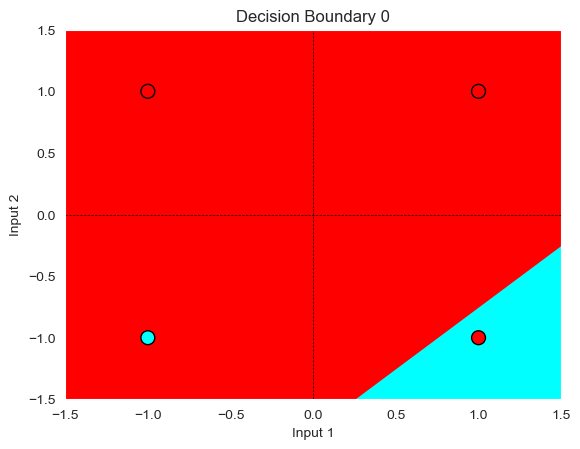

Iteration 1, output -1
0.2 -0.6000000000000001 0.84
Iteration 1, output -1
Iteration 1, output -1
Iteration 1, output -1


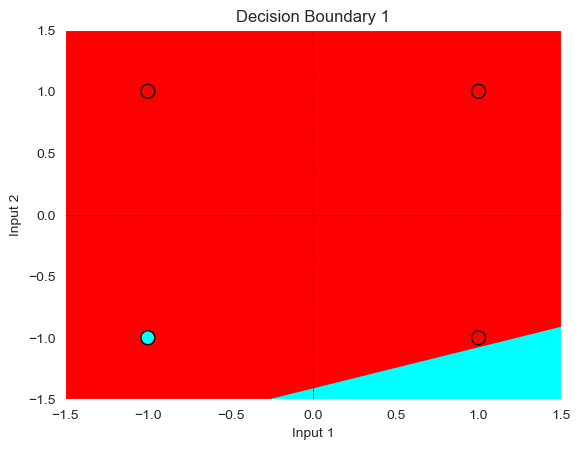

Iteration 2, output -1
0.0 -0.8 1.008
Iteration 2, output -1
Iteration 2, output -1
Iteration 2, output -1


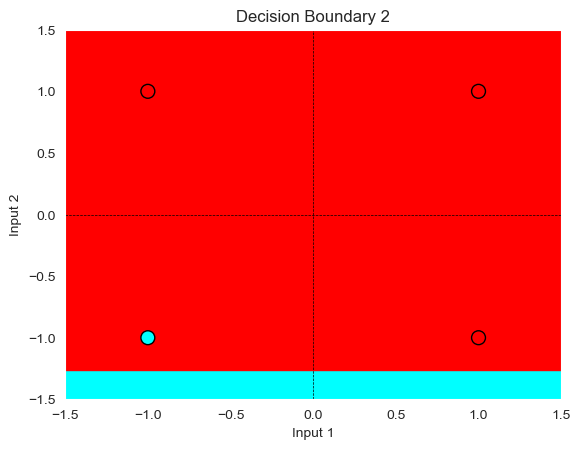

Iteration 3, output -1
-0.2 -1.0 1.2096
Iteration 3, output -1
Iteration 3, output -1
Iteration 3, output -1


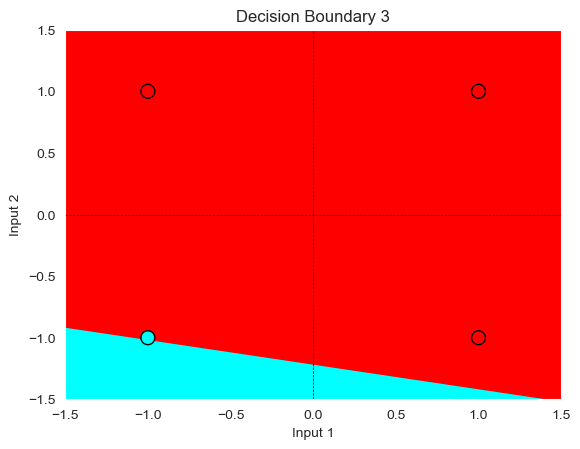

Iteration 4, output -1
-0.4 -1.2 1.45152
Iteration 4, output -1
Iteration 4, output -1
Iteration 4, output -1


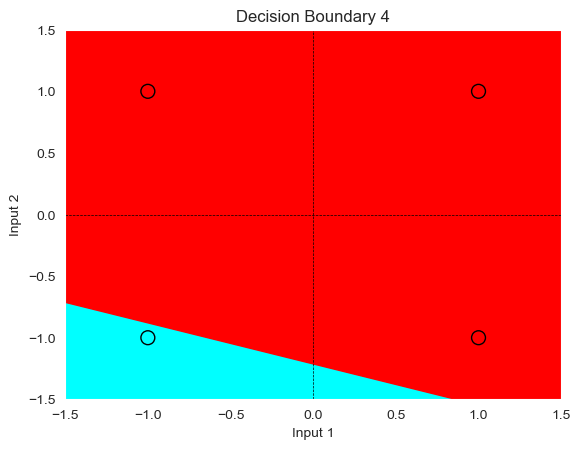

Iteration 5, output 1
Iteration 5, output -1
Iteration 5, output -1
Iteration 5, output -1


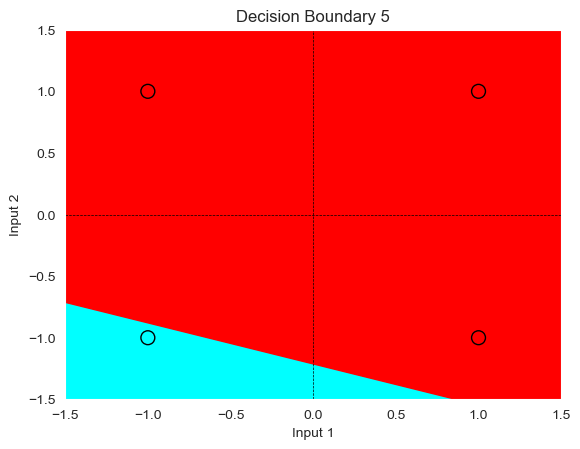

Number of iterations over the dataset: 5
Weight of input 1: -0.4
Weight of input 2: -1.2
Bias: 1.45152

Prediction of the dataset
Sample 0: 1
Sample 1: -1
Sample 2: -1
Sample 3: -1


In [9]:
#w_input1, w_input2, bias, iterations = SLP_Training(round(random.uniform(-1.0, 1.0), 1),
                                                    #round(random.uniform(-1.0, 1.0), 1),
                                                    #bias=round(random.uniform(-1.0, 1.0), 1), LR=0.1, df=df_NOR

# Report example
w_input1, w_input2, bias, iterations = SLP_Training(0.4, -0.4, bias=0.7, LR=0.1, df=df_NOR)
print("Number of iterations over the dataset:", iterations)
print("Weight of input 1:", w_input1)
print("Weight of input 2:", w_input2)
print("Bias:", bias, end="\n\n")

print("Prediction of the dataset")
for x in range(4):
    print(f"Sample {x}: {SLP(df_NOR['Input1'].iloc[x], w_input1, df_NOR['Input2'].iloc[x], w_input2, bias)}")

# Decision boundary visualization

In [10]:
def plot_decision_boundary(w_input1, w_input2, bias, df, number):
    # Crear la línea de decisión
    x_values = np.array([-1.5, 1.5])
    #x_values = np.linspace(0, 1.5, 10)
    y_values = (-w_input1 / w_input2) * x_values + bias / w_input2

    # Colorear toda el área por encima y por debajo de la línea
    plt.fill_between(x_values, -1.5, y_values, color='cyan')
    plt.fill_between(x_values, y_values, 1.5, color='red')

    # Crear un gráfico de dispersión para los puntos originales
    colors = np.where(df["Output"] == 1, 'cyan', 'red')
    plt.scatter(df["Input1"], df["Input2"], edgecolors='k', c = colors, s=100)

    # Configurar el gráfico
    plt.title(f'Decision Boundary {number}')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()